# DAT 205 Project - Team Analysis
## By Dennis Hung
## Version 1
## Code DRAFT 2021-04-02

## Code Strucuture
### Section 0: Function definitions
### Section 1: Import libraries
### Section 2: Configuration of variables

### Section 3: Load the dataset from file and initial analysis
- #### Section 3.1: Load the dataset from file
- #### Section 3.2: Initial Analysis

### Section 4: Transforming/cleansing the data 
- ### Section 4.1: Enhance the data
- - #### Prepare data enhancement attributes in dataframe (df_TF) and create UID
- - #### Create new TeamGameStats dataframe to aggregate data by UID_STG
- ### Section 4.2:  NBA Advanced Stat - PIE (Player Impact Efficiency)
- ### Section 4.3:  NBA Advanced Stat - PER (Player Efficiency Rating)
- ### Section 4.4 Filter data by Team (if specified)
- ### Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features
- ### Section 4.6: Transform categorical feature (WL) using value replace
- ### Section 4.7: Transform categorical features using LabelEncoder
- ### Using OneHotEncoding (Not Working)
- ### Section 4.8: Define TARGET variable and separate into dataframes by season type

## Section 5: Analysis - Heat Maps / Correlation Matrices
- ### Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs
- ### Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix
- ### Section 5.3: Re-check Heat Map / Correlation Matrix

## Section 6: Modeling and Analysis
- ### Section 6.1: Prepare train and test data
- ### Section 6.2: Apply Logistic Regression on the split train/test dataset
- ### Section 6.3: Apply Decision Tree Classifier on the split train/test dataset
- ### Section 6.4: Apply Random Forest Classifier on the split train/test dataset
- ### Section 6.5: Apply xgboost on the split train/test dataset
- ### (To be removed) Section 6.6: Apply SVM on the split train/test dataset

## (Issues) Section 7: Cross Validation Scores

## Section 8: Summary Report

## End of Code




# Updates

### 20210-04-02

- Adjusted configuration and with if statements to accept output file (AggrgatedTORGameLogs_2019-2020_Regular.csv) from Bhavika's code (AggregateTOR2019_2020.py)

### 2021-03-30

- Added models xgboost and SVM for testing
- Tuned all models (if possible)
- Added in code to save models https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
- Inserted flags to allow processing of certain models to focus model analysis processing

### 2021-03-27

Code fully working to handle 
- Loading of different files as raw from  "HistoricalGameLogs_*.csv' or after data enhancement "DAT205_Output_Enhanced_df_TF *.csv"
- Enable/disable data enhancment process
- Filtering by specific team or all the data before performing corelation matrix or model analysis





# Reference

#### How to Get NBA Data Using the nba_api Python Module (Beginner). Retrieved from Playing Numbers: 

https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/

#### Patel, S. (2020, August 19). swar / nba_api. Retrieved from GitHub: 

https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

#### Issues

https://github.com/swar/nba_api/issues/124



# Note: 
#### For this analysis, this code relies on the CSV output from "DAT 205-Group01-NBA-HistPlayGameLogs.ipynb" or the enhanced data from this code as the dataset 

# Section 0: Function definitions

hms_string(sec_elapsed)


In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60))/60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h,m,s)

# Null field analysis
def nullFieldAnalysis(df):
    df_missingDataInfo = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
    #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
    null_threshold = 0 
    print("")
    print("")
    print("==== Null value analysis ====")
    return df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

# CalcThreshold_List
def CalcThreshold_List(totalRecords):
    CTL_10 = int(round(totalRecords*0.1,0))
    CTL_20 = int(round(totalRecords*0.2,0))
    CTL_30 = int(round(totalRecords*0.3,0))
    CTL_40 = int(round(totalRecords*0.4,0))
    CTL_50 = int(round(totalRecords*0.5,0))
    CTL_60 = int(round(totalRecords*0.6,0))
    CTL_70 = int(round(totalRecords*0.7,0))
    CTL_80 = int(round(totalRecords*0.8,0))
    CTL_90 = int(round(totalRecords*0.9,0))
    CTL_100 = int(round(totalRecords*1,0))

    CTL_05 = int(round(totalRecords*0.05,0))
    CTL_15 = int(round(totalRecords*0.15,0))
    CTL_25 = int(round(totalRecords*0.25,0))
    CTL_35 = int(round(totalRecords*0.35,0))
    CTL_45 = int(round(totalRecords*0.45,0))
    CTL_55 = int(round(totalRecords*0.55,0))
    CTL_65 = int(round(totalRecords*0.65,0))
    CTL_75 = int(round(totalRecords*0.75,0))
    CTL_85 = int(round(totalRecords*0.85,0))
    CTL_95 = int(round(totalRecords*0.95,0))

    Threshold_List = [1, CTL_05, CTL_10, CTL_15, CTL_20, CTL_25, CTL_30, CTL_35, CTL_40, CTL_45, 
                    CTL_50, CTL_55, CTL_60, CTL_65, CTL_70, CTL_75, CTL_80, CTL_85, 
                    CTL_90, CTL_95, CTL_100]
    return Threshold_List


# Section 1: Import libraries

In [2]:
# Install any missing libraries
# pip install xgboost
# pip install tpot

In [3]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv
import time
import pickle
import joblib

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# For LogRegM_RSCV process
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score

# to fix xgboost warnings error
# https://github.com/EpistasisLab/tpot/issues/1139
# "Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior."
# from tpot import TPOTClassifier
# from tpot.config import classifier_config_dict

# from sklearn.ensemble import RandomForestRegressor


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
# from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format



start_time = time.time()

# Section 2: Configuration of variables

- Must manually set the following variables

- gameTypeListed as one of the following: 'Pre Season', 'Regular Season', 'Playoffs'



In [4]:

# General configuration
debug_active = 'yes'
loop_max = 100
# showNumRecs = 15
numFormat = '{:.4f}'
numFormat_Pct = "{:.0%}"

# Data Transformation 'yes' or other

# Option 1 (Initial modeling)
# dataEnhancement_active = 'yes'
# aggregatedTORGames = 'no'

# Option 2 (Remodel from initial data)
# dataEnhancement_active = 'no'
# aggregatedTORGames = 'no'

# Option 3 (Team data)
dataEnhancement_active = 'no'
aggregatedTORGames = 'yes'
    
# Section 3.1: Load the dataset from file
# pick who is running the code and comment out the others
# coder = 'bhavika'
# coder = 'cindy'
coder = 'dennis'

# Folder locations
if aggregatedTORGames == 'yes':
    folder_Input = 'D:/_Data-Den/GitHub/Capstone/Data/AggrgatedGameLogs/'
else:
    folder_Input = './'
folder_Output = 'D:/_Data-Den/GitHub/Capstone/Code/_Dennis_Sandbox/_Output/'

# Setup file name for csv or Excel (.xlsx)
if coder == 'bhavika':
    filename = 'D:/McMaster/DAT205/Capstone/Data/HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
elif coder == 'dennis':
    # filename = './HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
    # filename = './DAT205_Output_Enhanced_df_TF 2004-2020.csv'
    filename = folder_Input + 'AggrgatedGameLogs_2014-2020_Regular.csv'
    # Test Data files
    # filename = './HistoricalGameLogs_2007-08_to_2008-09_ALL.csv'
    # filename = './DAT205_Output_Enhanced_df_TF 2007-09.csv'
    

# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'


# Section 4.4 Filter data by Team (if specified)
# Filter the dataset by team or None
allTeamsList = ['CLE', 'LAC', 'NOH', 'WAS', 'ORL', 'NJN', 'PHX', 'DET', 'IND', \
       'CHA', 'DAL', 'ATL', 'NYK', 'CHI', 'BOS', 'MIN', 'PHI', 'HOU', \
       'POR', 'TOR', 'SAC', 'UTA', 'GSW', 'MIA', 'SEA', 'MEM', 'LAL', \
       'SAS', 'DEN', 'MIL', 'NOK', 'ZAK', 'CHN', 'PAN', 'RMA', 'MMT', \
       'MTA', 'MAL', 'LRO', 'EPT', 'OKC', 'LRY', 'BAR', 'MOS', 'OLP', \
       'PAR', 'LAB', 'MAC', 'MLN', 'BKN', 'FCB', 'RMD', 'MPS', 'EAM', \
       'ALB', 'FBU', 'NOP', 'UBB', 'FLA', 'BAU', 'FEN', 'SLA', 'SDS', \
       'BNE', 'MEL', 'SYD', 'GUA', 'PER', 'ADL', 'NZB', 'BJD', 'FRA']
teamSelected = 'None'
# teamSelected = 'TOR'

# Section 6: Modeling and Analysis
random_state_val = 42
model_list = ['LogRegM', 'DTM', 'RFM', 'RFM_RSCV', 'XGBM']

# Which models are active. At least 1 must be yes
useModel_LogRegM = 'yes'
useModel_LogRegM_RSCV = 'yes'
useModel_DTM = 'yes'
useModel_DTM_RSCV = 'yes'
useModel_RFM = 'yes'
useModel_RFM_RSCV = 'yes'
useModel_XGBM = 'yes'
useModel_XGBM_RSCV = 'yes'
useModel_SVCM = 'no'


# Section 6.1: Prepare train and test data
# Select a season 
gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
gameTypeListed_code = [0, 1, 2]
gameTypeToProcess = 1
test_size_val = 0.3

# Section 5: Analysis - Heat Maps / Correlation Matrices
plotSize = (20,15)




# Section 3: Load the dataset from file and initial analysis

## Section 3.1: Load the dataset from file

In [5]:
# load the CSV or Excel file 
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code

# lst of column names which needs to be string
lst_str_cols = ['GAME_ID']
# use dictionary comprehension to make dict of dtypes
dict_dtypes = {x : 'str'  for x in lst_str_cols}
# use dict on dtypes
df = pd.read_csv(filename, dtype=dict_dtypes)
# Excel file import
# df = pd.read_excel(filename)

# Remove duplicate index from import
if dataEnhancement_active == 'yes':
    unwanted_list = ['Unnamed: 0']
else: 
    if aggregatedTORGames == 'yes':
        unwanted_list = ['Unnamed: 0']
    else:
        unwanted_list = ['Unnamed: 0', 'UID_STG']

X_headers_list = df.columns.tolist()
for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df_Initial = df[X_headers_list]

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Initial)
    # Examine shape of dataframe
    display(df_Initial.shape)
    # Examine the type of attributes in the dataframe
    print("Shape of the dataset")
    df_Initial.info()
    # Describe the numerical data
    df_Initial.describe()
    


,SEASON_YEAR,Game_Type,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400013,2004-11-03T00:00:00,ATL @ PHX,L,240.0,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400029,2004-11-05T00:00:00,ATL @ SEA,L,240.0,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400044,2004-11-07T00:00:00,ATL @ LAL,L,240.0,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400051,2004-11-09T00:00:00,ATL vs. CLE,L,240.0,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400077,2004-11-12T00:00:00,ATL @ NOH,W,240.0,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900909,2020-03-03T00:00:00,CHA vs. SAS,L,240.0,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900926,2020-03-05T00:00:00,CHA vs. DEN,L,240.0,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900940,2020-03-07T00:00:00,CHA vs. HOU,W,240.0,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900957,2020-03-09T00:00:00,CHA @ ATL,L,290.0,...,9,6,5,22,26,138,-5.0,1,0,159.115943


(38536, 34)

Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38536 entries, 0 to 38535
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        38536 non-null  object 
 1   Game_Type          38536 non-null  object 
 2   TEAM_ID            38536 non-null  int64  
 3   TEAM_ABBREVIATION  38536 non-null  object 
 4   TEAM_NAME          38536 non-null  object 
 5   GAME_ID            38536 non-null  object 
 6   GAME_DATE          38536 non-null  object 
 7   MATCHUP            38536 non-null  object 
 8   WL                 38536 non-null  object 
 9   MIN                38536 non-null  float64
 10  FGM                38536 non-null  int64  
 11  FGA                38536 non-null  int64  
 12  FG_PCT             38536 non-null  float64
 13  FG3M               38536 non-null  int64  
 14  FG3A               38536 non-null  int64  
 15  FG3_PCT            38536 non-null  float64
 16  F

## Section 3.2: Initial Analysis

In [6]:
# Display the headers of columns that use descriptive or non-numerical values
categorical_Features = df_Initial.dtypes[df_Initial.dtypes == "object"].index.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    print("VALIDATION CODE")
    print(categorical_Features)

# Describe the categorical data
print("")
print("")
print("==== Description of the categorical features ====")
display(df_Initial[categorical_Features].describe())

# # Null field analysis
nullFieldAnalysis(df_Initial)
# # Null field analysis
# df_missingDataInfo = pd.DataFrame({'Count': df_Initial.isnull().sum(), 'Percent': 100*df_Initial.isnull().sum()/len(df)})

# #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
# null_threshold = 0 
# print("")
# print("")
# print("==== Null value analysis ====")
# df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

VALIDATION CODE
['SEASON_YEAR', 'Game_Type', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL']


==== Description of the categorical features ====


,SEASON_YEAR,Game_Type,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL
count,38536,38536,38536,38536,38536,38536,38536,38536
unique,16,1,34,36,19268,2561,2204,2
top,2018-19,Regular Season,DAL,Dallas Mavericks,21200861,2014-04-16T00:00:00,MEM vs. SAS,L
freq,2460,38536,1289,1289,2,30,33,19268




==== Null value analysis ====


,Count,Percent


# 

# Section 4: Transforming/cleansing the data 

## Data cleansing of nulls (Not working)

## Correction to missing PreSeason games WL values only 

49 PreSeason records 

2007-08 
GAME_ID 0010700072 / 2007-10-19
BOS vs NJN   W 36 to L 33

2008-09 
GAME_ID 0010800035 / 2008-10-11
DEN vs PHX   W 77 to L 72
Note some player game data seems missing

## Corrected missing player name data

740 records (727 preseason and 13 regular season)

This is not important as the player names are excluded from the analysis



## Section 4.1: Enhance the data

In [7]:
# Setup variables for data transformation
df_TF = df_Initial
totalNumRec = df_TF.shape[0]

# Check df_TeamGameStats
# VALIDATION CODE 
if debug_active == 'yes':
    print(totalNumRec)
    display(df_TF)
    print(df_TF.columns)

38536


,SEASON_YEAR,Game_Type,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400013,2004-11-03T00:00:00,ATL @ PHX,L,240.0,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400029,2004-11-05T00:00:00,ATL @ SEA,L,240.0,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400044,2004-11-07T00:00:00,ATL @ LAL,L,240.0,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400051,2004-11-09T00:00:00,ATL vs. CLE,L,240.0,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,20400077,2004-11-12T00:00:00,ATL @ NOH,W,240.0,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900909,2020-03-03T00:00:00,CHA vs. SAS,L,240.0,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900926,2020-03-05T00:00:00,CHA vs. DEN,L,240.0,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900940,2020-03-07T00:00:00,CHA vs. HOU,W,240.0,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,21900957,2020-03-09T00:00:00,CHA @ ATL,L,290.0,...,9,6,5,22,26,138,-5.0,1,0,159.115943


Index(['SEASON_YEAR', 'Game_Type', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'DD2', 'TD3', 'PER'],
      dtype='object')


### Prepare data enhancement attributes in dataframe (df_TF) and create UID 

In [8]:
if dataEnhancement_active == 'yes':
    # Add columns for
    #   UID_STG for SEASON_YEAR', 'TEAM_ID', 'GAME_ID'
    #   PIE for Performance Impact Efficiency
    #   PER for Player Efficieny Rating

    addFieldInTFList = ['UID_STG', 'PIE', 'PER']
    for addField in addFieldInTFList:
        df_TF[addField] = 'new field'

    # Reference to sum column values under certain condition.
    # https://intellipaat.com/community/49/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas
    # https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/  
    # https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

    # # TEST CODE
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'] + str(df_TF['TEAM_ID'] +  df_TF['GAME_ID'])
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'])
    # df_TF['PIE'] = df_TF['PIE'].map(lambda df_TF['PIE']: df_TF['SEASON_YEAR'])

    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time01 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0

    for currNumRec in range(totalNumRec):
        df_TF['UID_STG'].loc[currNumRec] = df_TF['SEASON_YEAR'].loc[currNumRec] + str(df_TF['TEAM_ID'].loc[currNumRec]) +  df_TF['GAME_ID'].loc[currNumRec]
        
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took01 = time.time() - start_time01
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took01), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TF)

### Create new TeamGameStats dataframe to aggregate data by UID_STG

This is used by PIE

In [9]:
if dataEnhancement_active == 'yes':
    # Create dataframe of team game stats
    TeamGameStats_List = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3', 'PIE_Bottom']

    # df_TeamGameStats = pd.DataFrame(data, index=index, columns=columns)
    df_TeamGameStats = pd.DataFrame(df_TF['UID_STG'].unique(), columns = ['UID_STG'])

    for TeamGameStat in TeamGameStats_List:
        df_TeamGameStats[TeamGameStat] = ''

# if dataEnhancement_active == 'yes':
    # Populate the dataframe with TeamGameStats for currNumRec in range(totalNumRec):
    totalNumRec_TGS = df_TeamGameStats.shape[0]

    TeamGameStat_List = df_TeamGameStats['UID_STG'].tolist()
    Threshold_List_TGS = CalcThreshold_List(totalNumRec_TGS)
    start_time02 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec_TGS)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    # for currTeamGameStat in TeamGameStat_List:  
    for currNumRec2 in range(totalNumRec_TGS):    
        # Pull UID_STG from df_TeamGameStats 
        currTeamGameUID = df_TeamGameStats['UID_STG'].loc[currNumRec2]
        # Filter df_TF by UID_STG and create temp dataframe for this data
        df_TF_Temp = []
        df_TF_Temp = df_TF[df_TF['UID_STG']==currTeamGameUID]
        # Input in to df_TeamGameStats row with the following calculations for 
        # 'SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 
        # 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK',
        # 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3'
        df_TeamGameStats['SEASON_YEAR'].loc[currNumRec2] = df_TF_Temp['SEASON_YEAR'].unique()[0]
        df_TeamGameStats['TEAM_ABBREVIATION'].loc[currNumRec2] = df_TF_Temp['TEAM_ABBREVIATION'].unique()[0]
        df_TeamGameStats['Game_Type'].loc[currNumRec2] = df_TF_Temp['Game_Type'].unique()[0]
        df_TeamGameStats['GmFGM'].loc[currNumRec2] = df_TF_Temp['FGM'].sum()
        df_TeamGameStats['GmFGA'].loc[currNumRec2] = df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG_PCT'].loc[currNumRec2] = df_TF_Temp['FGM'].sum() / df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG3M'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum()
        df_TeamGameStats['GmFG3A'].loc[currNumRec2] = df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFG3_PCT'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum() / df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFTM'].loc[currNumRec2] = df_TF_Temp['FTM'].sum()
        df_TeamGameStats['GmFTA'].loc[currNumRec2] = df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmFT_PCT'].loc[currNumRec2] = df_TF_Temp['FTM'].sum() / df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmOREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum()
        df_TeamGameStats['GmDREB'].loc[currNumRec2] = df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum() + df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmAST'].loc[currNumRec2] = df_TF_Temp['AST'].sum()
        df_TeamGameStats['GmTOV'].loc[currNumRec2] = df_TF_Temp['TOV'].sum()
        df_TeamGameStats['GmSTL'].loc[currNumRec2] = df_TF_Temp['STL'].sum()
        df_TeamGameStats['GmBLK'].loc[currNumRec2] = df_TF_Temp['BLK'].sum()
        df_TeamGameStats['GmBLKA'].loc[currNumRec2] = df_TF_Temp['BLKA'].sum()
        df_TeamGameStats['GmPF'].loc[currNumRec2] = df_TF_Temp['PF'].sum()
        df_TeamGameStats['GmPFD'].loc[currNumRec2] = df_TF_Temp['PFD'].sum()
        df_TeamGameStats['GmPTS'].loc[currNumRec2] = df_TF_Temp['PTS'].sum()
        df_TeamGameStats['GmPLUS_MINUS'].loc[currNumRec2] = df_TF_Temp['PLUS_MINUS'].sum() / 5
        df_TeamGameStats['GmDD2'].loc[currNumRec2] = df_TF_Temp['DD2'].sum()
        df_TeamGameStats['GmTD3'].loc[currNumRec2] = df_TF_Temp['TD3'].sum()
        
        # PIE_Bottom 
        PIE_Bottom = (df_TeamGameStats['GmPTS'].loc[currNumRec2] + df_TeamGameStats['GmFGM'].loc[currNumRec2] + df_TeamGameStats['GmFTM'].loc[currNumRec2] \
        - df_TeamGameStats['GmFGA'].loc[currNumRec2] - df_TeamGameStats['GmFTA'].loc[currNumRec2] \
        + df_TeamGameStats['GmDREB'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmOREB'].loc[currNumRec2]) \
        + df_TeamGameStats['GmAST'].loc[currNumRec2] + df_TeamGameStats['GmSTL'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmBLK'].loc[currNumRec2]) \
        - df_TeamGameStats['GmPF'].loc[currNumRec2] - df_TeamGameStats['GmTOV'].loc[currNumRec2])
        # Insert calculated value into dataframe
        df_TeamGameStats['PIE_Bottom'].loc[currNumRec2] = PIE_Bottom
        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List_TGS:
            currPctCompleted = round((currNumRecord / totalNumRec_TGS) *100,1)
            time_took02 = time.time() - start_time02
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took02), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

In [10]:
if dataEnhancement_active == 'yes':
    columnsToDropFrom_TGS = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M' \
    , 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL' \
    , 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3']

    for dropColumn_TGS in columnsToDropFrom_TGS:
        del df_TeamGameStats[dropColumn_TGS]

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

## Section 4.2:  NBA Advanced Stats 

#### PIE (Player Impact Estimate)

Definition PIE measures a player's overall statistical contribution against the total statistics in games they play in. PIE yields results which are comparable to other advanced statistics (e.g. PER) using a simple formula.

Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)


#### PER (Player Efficiency Rating)

PER = (FGM x 85.910 + Steals * 53.897 + 3PTM * 51.757 + FTM x 46.845 + Blocks * 39.190 + Offensive_Reb * 39.190 + Assists * 34.677 + Defensive_Reb x 14.707 - Foul * 17.174 - FT_Miss x 20.091 - FG_Miss * 39.190 - TO * 53.897) * (1 / Minutes)
 

In [11]:
if dataEnhancement_active == 'yes':
    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time03 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    for currNumRec in range(totalNumRec):
        # Calculates PIE
        # PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

        PIE_Top = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
            - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
            + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
            + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
            - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])
        # Get the UID_STG from the Player record df_TF
        Ref_UID_STG_Value = df_TF['UID_STG'].loc[currNumRec]   

        df_currTGSs = df_TeamGameStats[df_TeamGameStats['UID_STG']==Ref_UID_STG_Value]
        PIE_Bottom = df_currTGSs.iloc[0]['PIE_Bottom']
        PIE = PIE_Top / PIE_Bottom * 100
        df_TF['PIE'].loc[currNumRec] = PIE

        # # Calculates PER
        # # PER= (FGM * 85.910 + Steals * 53.897+ 3PTM * 51.757 + FTM * 46.845 + Blocks * 39.190 + Offensive_Reb * 39.190 + Assists * 34.677
        # #            + Defensive_Reb * 14.707 - Foul * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190- TO * 53.897) x (1 / Minutes)
        if df_TF['MIN'].loc[currNumRec] == 0:
            PER = 0
        else:
            FT_Miss = df_TF['FTA'].loc[currNumRec] - df_TF['FTM'].loc[currNumRec]
            FG_Miss = df_TF['FGA'].loc[currNumRec] - df_TF['FGM'].loc[currNumRec]
            
            PER = (df_TF['FGM'].loc[currNumRec] * 85.910 + df_TF['STL'].loc[currNumRec] * 53.897 \
            + df_TF['FG3M'].loc[currNumRec] * 51.757 + df_TF['FTM'].loc[currNumRec] * 46.845 \
            + df_TF['BLK'].loc[currNumRec] * 39.190 + df_TF['OREB'].loc[currNumRec] * 39.190 \
            + df_TF['AST'].loc[currNumRec] * 34.677 + df_TF['DREB'].loc[currNumRec] * 14.707 \
            - df_TF['PF'].loc[currNumRec] * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190 \
            - df_TF['TOV'].loc[currNumRec] * 53.897) / df_TF['MIN'].loc[currNumRec]

        df_TF['PER'].loc[currNumRec] = PER


        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took03 = time.time() - start_time03
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took03), "    |   ", currNumRecord)

In [12]:
# Save enhanced data as CSV to avoid reprocessing
df_TF.to_csv(folder_Output + 'DAT205_Output_Enhanced_df_TF.csv') 

## Section 4.4 Filter data by Team (if specified)

In [13]:
# If a specific team is selected by 'TEAM_ABBREVIATION' then recreate the dataframe with this filter else use the entire dataset as is.
if aggregatedTORGames == 'no':
    if teamSelected in allTeamsList:
        df_TF = df_TF[df_TF['TEAM_ABBREVIATION']==teamSelected]
    else:
        df_TF    
    display(df_TF)
    # Save enhanced data as CSV to avoid reprocessing
    df_TF.to_csv(folder_Output + 'DAT205_Output_Enhanced_df_TF_' + teamSelected + '.csv') 


## Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features

#### Note: if data enhancement done then adjust 
unwanted_categorical_Features_TF

In [14]:
# Gather current list of features
numerical_Features = df_TF.columns.tolist()

# All possible features
# ['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type']

for i in categorical_Features: 
    numerical_Features.remove(i)

# Lists unwanted features
if aggregatedTORGames == 'yes':
    unwanted_numerical_Features = []
    unwanted_categorical_Features = ['GAME_ID', 'GAME_DATE', 'MATCHUP']
else:
    unwanted_numerical_Features = ['PLAYER_ID', 'TEAM_ID']
    unwanted_categorical_Features = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']

# # if Enchancement done then use this to get rid of what extras you don't want.
if dataEnhancement_active == 'yes':
    unwanted_categorical_Features_TF = ['UID_STG']

# unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
if dataEnhancement_active == 'yes':
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
else:
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features
X_headers_list = df_TF.columns.tolist()

for i in unwanted_list_01:
    X_headers_list.remove(i)

# Reset new dataframe with desired features
df_Reduced = df_TF[X_headers_list]

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

['SEASON_YEAR',
 'Game_Type',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'WL',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'PER']

## Section 4.6: Transform categorical feature (WL) using value replace

In [15]:
if aggregatedTORGames == 'yes':
    cleaned_categorical_Features = ['WL']
    cleanupValue = {'WL': {'W': 1, 'L': 0}}
else:
    cleaned_categorical_Features = ['WL', 'Game_Type']
    cleanupValue = {'WL': {'W': 1, 'L': 0}, 'Game_Type': {'Pre Season': 0, 'Regular Season': 1, 'Playoffs': 2}}
df_Reduced = df_Reduced.replace(cleanupValue)

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Reduced)

,SEASON_YEAR,Game_Type,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,WL,MIN,FGM,FGA,FG_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,96,0.333333,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,31,74,0.418919,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,37,86,0.430233,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,73,0.438356,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,1,240.0,38,76,0.500000,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,39,82,0.475610,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,38,77,0.493506,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,1,240.0,37,70,0.528571,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,290.0,49,104,0.471154,...,9,6,5,22,26,138,-5.0,1,0,159.115943


## Section 4.7: Transform categorical features using LabelEncoder

This will work with the reminding categorical values as there is a hierarchy for 

'SEASON_YEAR' - the more recent the season the more relevant it is where as older data is less valuable

'Game_Type' - need to think about this but assume regular season is more important

In [16]:
# # Select features to encode
e_categorical = categorical_Features

print(e_categorical)

for i in unwanted_categorical_Features:
    e_categorical.remove(i)

print(unwanted_categorical_Features)

for j in cleaned_categorical_Features:
    e_categorical.remove(j)

print(cleaned_categorical_Features)

print(e_categorical)

# Reset variable
categorical_Features = df_Reduced.dtypes[df_Reduced.dtypes == "object"].index.tolist()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

df_Encoded = df_Reduced
# df_Encoded = df_Reduced[e_categorical]




['SEASON_YEAR', 'Game_Type', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL']
['GAME_ID', 'GAME_DATE', 'MATCHUP']
['WL']
['SEASON_YEAR', 'Game_Type', 'TEAM_ABBREVIATION', 'TEAM_NAME']


In [17]:
# Apply LabelEncoding on e_categorical features

if aggregatedTORGames == 'no':
    for k in e_categorical:
        val_A = k
        val_B = k + '_code'
        df_Encoded[(val_B)] = lb_make.fit_transform(df_Encoded[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded) #Results in appending a new column to df

,SEASON_YEAR,Game_Type,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,WL,MIN,FGM,FGA,FG_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,96,0.333333,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,31,74,0.418919,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,37,86,0.430233,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,73,0.438356,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,1,240.0,38,76,0.500000,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,39,82,0.475610,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,38,77,0.493506,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,1,240.0,37,70,0.528571,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,290.0,49,104,0.471154,...,9,6,5,22,26,138,-5.0,1,0,159.115943


## Section 4.8: Define TARGET variable and separate into dataframes by season type

Remove (Stage 2) from dataframe the featuree (categorical, Target, and other unwanted)

Separating the dataframe by gameTypeListed ('Pre Season', 'Regular Season', 'Playoffs')

In [18]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded)
    print(e_categorical)

,SEASON_YEAR,Game_Type,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,WL,MIN,FGM,FGA,FG_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,96,0.333333,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,31,74,0.418919,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,37,86,0.430233,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,0,240.0,32,73,0.438356,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,2004-05,Regular Season,1610612737,ATL,Atlanta Hawks,1,240.0,38,76,0.500000,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,39,82,0.475610,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,240.0,38,77,0.493506,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,1,240.0,37,70,0.528571,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,2019-20,Regular Season,1610612766,CHA,Charlotte Hornets,0,290.0,49,104,0.471154,...,9,6,5,22,26,138,-5.0,1,0,159.115943


['SEASON_YEAR', 'Game_Type', 'TEAM_ABBREVIATION', 'TEAM_NAME']


In [19]:
# Configure variables
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]
if aggregatedTORGames == 'yes':
    Y_headers_list1 = ['WL']
    Y_headers_list2 = ['WL']
else:
    Y_headers_list1 = ['WL', 'Game_Type']
    Y_headers_list2 = ['WL']

e_categorical = e_categorical + Y_headers_list2

# Define the current list of features
X_headers_list = df_Encoded.columns.tolist()

# Remove LabelEncoded categorical features
for k in e_categorical:
    X_headers_list.remove(k)

# VALIDATION CODE 
if debug_active == 'yes':
    print(e_categorical)

['SEASON_YEAR', 'Game_Type', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'WL']


In [20]:
df_X_Reduced2 = df_Encoded[X_headers_list]
df_Y_Reduced2 = df_Encoded[Y_headers_list1]

if aggregatedTORGames == 'yes':
    df_X_RegularSeason = df_X_Reduced2
    df_Y_RegularSeason = df_Y_Reduced2
else:
    cleanDFColumns = ['Game_Type', 'SEASON_YEAR_code']
    # cleanDFColumns = ['Game_Type']

    for gameType in gameTypeListed_code:
        is_gameType_X = df_X_Reduced2['Game_Type']==gameType
        is_gameType_Y = df_Y_Reduced2['Game_Type']==gameType
        if gameType == 0:
            df_X_PreSeason = df_X_Reduced2[is_gameType_X]
            df_X_PreSeason = df_X_PreSeason.drop(cleanDFColumns, axis=1)
            df_Y_PreSeason = df_Y_Reduced2[is_gameType_Y]
            df_Y_PreSeason = df_Y_PreSeason[Y_headers_list2]
        elif gameType == 1:
            df_X_RegularSeason = df_X_Reduced2[is_gameType_X]
            df_X_RegularSeason = df_X_RegularSeason.drop(cleanDFColumns, axis=1)
            df_Y_RegularSeason = df_Y_Reduced2[is_gameType_Y]
            df_Y_RegularSeason = df_Y_RegularSeason[Y_headers_list2]
        elif gameType == 2:
            df_X_Playoffs = df_X_Reduced2[is_gameType_X]
            df_X_Playoffs = df_X_Playoffs.drop(cleanDFColumns, axis=1)
            df_Y_Playoffs = df_Y_Reduced2[is_gameType_Y]
            df_Y_Playoffs = df_Y_Playoffs[Y_headers_list2]

    # VALIDATION CODE 
    if debug_active == 'yes':
        print("")
        print("Pre Season")
        display(df_X_PreSeason)
        display(df_Y_PreSeason)
        print("")
        print("Regular Season")
        display(df_X_RegularSeason)
        display(df_Y_RegularSeason)
        print("")
        print("Playoffs")
        display(df_X_Playoffs)
        display(df_Y_Playoffs)

# Section 5: Analysis - Heat Maps / Correlation Matrices

## Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs

In [21]:
if aggregatedTORGames == 'no':
    plotSize = (20,15)
    # import seaborn as sns
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)

    # sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
    print("")
    print("Pre Season")
    sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

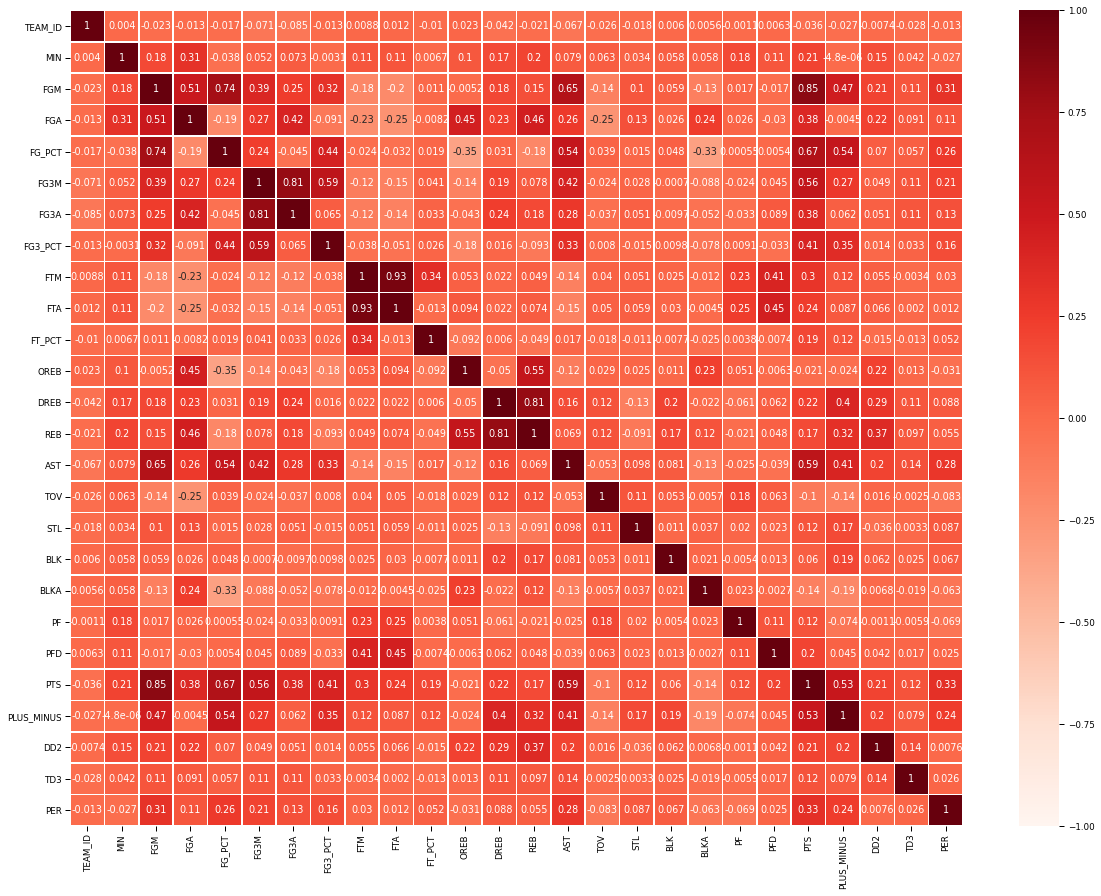

In [22]:
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)


In [23]:
if aggregatedTORGames == 'no':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Playoffs")
    sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_Playoffs)

## Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix

### Note: Adjust features to remove after analyzing the matrices

In [24]:
## Analysis of heat maps
### Removed anything over 0.85
#### PTS, FGA, FG3M, FTM, PFD, REB

### For if aggregatedTORGames is 'yes':

#### FTM vs FTA

### for if aggregatedTORGames is 'no'
### 2005-2020 TOR

### Preseason
#### FGM vs PTS
#### FGA vs PTS
#### FGM vs FGA
#### FTM vs FTA
#### PFD vs FTM FTA
#### REB vs DREB

### Reg Season
#### FGM vs PTS
#### FGA vs PTS
#### FGM vs FGA
#### FGA vs MIN
#### FG3A vs FG3M
#### FTM vs FTA
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


### Playoffs
#### FGM vs FGA
#### FGM vs PTS
#### FGA vs PTS
#### FGA vs MIN
#### FTA vs FTM
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB




In [25]:
# Remove unwanted/useless features. anything over 85% was removed
if aggregatedTORGames == 'yes':
    unwanted_list_02 = ['FTM']
    df_X_RegularSeason = df_X_RegularSeason.drop(unwanted_list_02, axis=1)
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_X_RegularSeason)
else:
    # unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']
    unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']

    for gameType in gameTypeListed_code:
        if gameType == 0:
            df_X_PreSeason = df_X_PreSeason.drop(unwanted_list_02, axis=1)
        elif gameType == 1:
            df_X_RegularSeason = df_X_RegularSeason.drop(unwanted_list_02, axis=1)
        elif gameType == 2:
            df_X_Playoffs = df_X_Playoffs.drop(unwanted_list_02, axis=1)

    # Remaining features and after removal of unwanted features in the dataframes
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_X_PreSeason)
        display(df_X_RegularSeason)
        display(df_X_Playoffs)    

,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTA,FT_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,1610612737,240.0,32,96,0.333333,5,15,0.333333,23,0.565217,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,1610612737,240.0,31,74,0.418919,5,10,0.500000,24,0.750000,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,1610612737,240.0,37,86,0.430233,4,18,0.222222,17,0.705882,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,1610612737,240.0,32,73,0.438356,1,11,0.090909,23,0.608696,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,1610612737,240.0,38,76,0.500000,6,12,0.500000,22,0.636364,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,1610612766,240.0,39,82,0.475610,12,29,0.413793,18,0.722222,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,1610612766,240.0,38,77,0.493506,13,33,0.393939,28,0.821429,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,1610612766,240.0,37,70,0.528571,15,32,0.468750,25,0.760000,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,1610612766,290.0,49,104,0.471154,19,48,0.395833,23,0.913043,...,9,6,5,22,26,138,-5.0,1,0,159.115943


## Section 5.3: Re-check Heat Map / Correlation Matrix

This is only a check but not necessary.

In [26]:
if aggregatedTORGames == 'no':
    # VALIDATION CODE 
    if debug_active == 'yes':
        plt.figure(figsize=plotSize)
        sns.set_context("paper", font_scale=1)
        print("")
        print("Pre Season")
        sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
        # display(df_X_PreSeason)



Regular Season


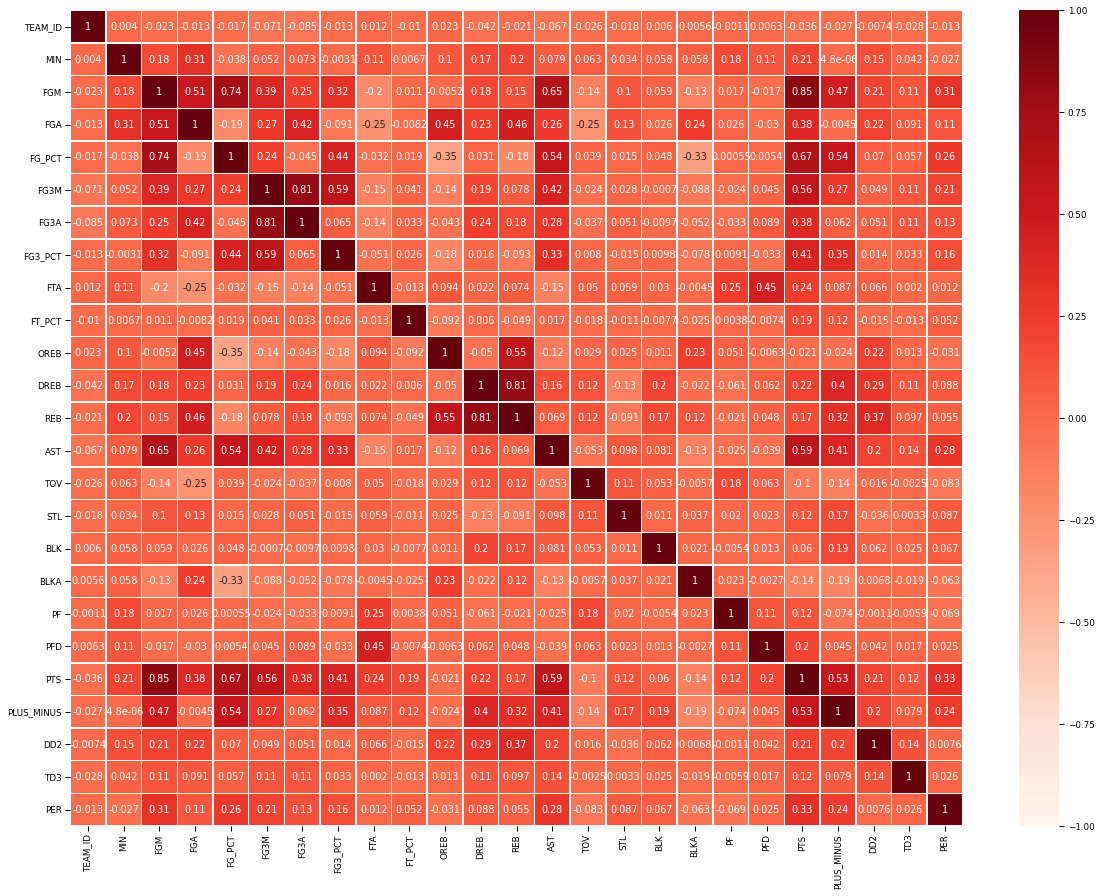

In [27]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Regular Season")
    sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_RegularSeason)

In [28]:
if aggregatedTORGames == 'no':
    # VALIDATION CODE 
    if debug_active == 'yes':
        plt.figure(figsize=plotSize)
        sns.set_context("paper", font_scale=1)
        print("")
        print("Playoffs")
        sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
        # display(df_X_Playoffs)

# Section 6: Modeling and Analysis

## Section 6.1: Prepare train and test data

In [29]:

# Auto sets va
if aggregatedTORGames == 'yes':
    gameTypeToProcess = 1

# Select a season 
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]

if gameTypeToProcess == 0:
    X = df_X_PreSeason
    Y = df_Y_PreSeason
elif gameTypeToProcess == 1:
    X = df_X_RegularSeason
    Y = df_Y_RegularSeason
elif gameTypeToProcess == 2:
    X = df_X_Playoffs
    Y = df_Y_Playoffs

# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

selectedSeasonRecordCount = X_train.shape[0] + X_test.shape[0]

# VALIDATION CODE 
if debug_active == 'yes':
    # Validate the split at a high level
    print(X_train.shape,Y_train.shape)
    print(X_test.shape,Y_test.shape)
    print('Season Type: ', gameTypeToProcess)
    df_Encoded.to_csv(folder_Output + 'DAT205_Output_All.csv') 
    X_train.to_csv(folder_Output + 'DAT205_Output_Split_X_train.csv') 
    X_test.to_csv(folder_Output + 'DAT205_Output_Split_X_test.csv') 
    Y_train.to_csv(folder_Output + 'DAT205_Output_Split_Y_train.csv') 
    Y_test.to_csv(folder_Output + 'DAT205_Output_Split_Y_test.csv') 
    display(X_train)
    display(Y_train)


(26975, 25) (26975, 1)
(11561, 25) (11561, 1)
Season Type:  1


,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTA,FT_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
5699,1610612746,240.0,34,78,0.435897,5,14,0.357143,34,0.852941,...,11,13,3,23,27,102,1.0,1,0,148.008177
4070,1610612756,240.0,35,79,0.443038,7,27,0.259259,28,0.928571,...,6,10,6,14,21,103,9.0,1,0,90.761689
4149,1610612757,240.0,37,80,0.462500,5,12,0.416667,19,0.631579,...,9,3,5,22,18,91,8.0,0,0,107.523628
912,1610612748,240.0,29,67,0.432836,6,15,0.400000,37,0.783784,...,7,8,2,26,0,93,10.0,2,0,100.209878
31109,1610612762,240.0,38,80,0.475000,13,32,0.406250,29,0.620690,...,5,7,1,18,23,107,6.0,1,0,177.824046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1610612753,240.0,39,68,0.573529,9,15,0.600000,30,0.633333,...,8,7,3,24,23,106,32.0,1,0,182.160187
11284,1610612754,240.0,35,80,0.437500,9,24,0.375000,31,0.903226,...,9,9,3,27,23,107,5.0,0,0,140.574105
38158,1610612761,240.0,38,92,0.413043,13,42,0.309524,43,0.767442,...,13,3,8,25,34,122,5.0,0,0,191.440208
860,1610612747,240.0,37,89,0.415730,9,24,0.375000,23,0.869565,...,6,5,7,23,0,103,-6.0,3,0,118.588753


,WL
5699,1
4070,1
4149,1
912,1
31109,1
...,...
6265,1
11284,1
38158,1
860,0


In [30]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(X)
    display(Y)

,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTA,FT_PCT,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PER
0,1610612737,240.0,32,96,0.333333,5,15,0.333333,23,0.565217,...,9,4,8,24,0,82,-30.0,1,0,83.242861
1,1610612737,240.0,31,74,0.418919,5,10,0.500000,24,0.750000,...,6,2,10,26,0,85,-21.0,0,0,75.290591
2,1610612737,240.0,37,86,0.430233,4,18,0.222222,17,0.705882,...,12,4,7,24,0,90,-16.0,0,0,138.870505
3,1610612737,240.0,32,73,0.438356,1,11,0.090909,23,0.608696,...,8,2,5,27,0,79,-14.0,0,0,93.127761
4,1610612737,240.0,38,76,0.500000,6,12,0.500000,22,0.636364,...,10,2,4,24,0,96,1.0,1,0,107.122601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,1610612766,240.0,39,82,0.475610,12,29,0.413793,18,0.722222,...,4,2,5,16,16,103,-1.0,0,0,128.720175
38532,1610612766,240.0,38,77,0.493506,13,33,0.393939,28,0.821429,...,7,2,5,23,21,112,-2.0,0,0,159.719991
38533,1610612766,240.0,37,70,0.528571,15,32,0.468750,25,0.760000,...,7,1,3,15,25,108,9.0,0,0,143.371047
38534,1610612766,290.0,49,104,0.471154,19,48,0.395833,23,0.913043,...,9,6,5,22,26,138,-5.0,1,0,159.115943


,WL
0,0
1,0
2,0
3,0
4,1
...,...
38531,0
38532,0
38533,1
38534,0


## Section 6.2: Apply Logistic Regression on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)



In [31]:
# np.isnan(df_Encoded.any())
# np.isfinite(df_Encoded.all())

# np.any(np.isnan(df_Encoded))
# np.all(np.isfinite(df_Encoded))

### Logistic Regression - Base Model

In [32]:
if useModel_LogRegM == 'yes':
    start_time_LogRegM = time.time()
    
    # Create the model
    LogRegM = LogisticRegression(C=1, solver='liblinear', random_state = random_state_val)

    # Train the model
    LogRegM.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(LogRegM, folder_Output + "LogRegM_TeamModel.joblib")

    # Predict using test data
    Y_pred = LogRegM.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_LogRegM.csv') 
    
    time_took_LogRegM = time.time() - start_time_LogRegM
    
    # Y_pred = pd.DataFrame(Y_pred, columns = ["WL_code"])
    # df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(Y_pred)
        display(df_Y_pred)

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

,Y_pred
0,0
1,1
2,1
3,0
4,1
...,...
11556,1
11557,1
11558,0
11559,1


## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [33]:
if useModel_LogRegM == 'yes':
    accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
    f1_score_LogRegM = f1_score(Y_test, Y_pred)
    recall_score_LogRegM = recall_score(Y_test, Y_pred)
    precision_score_LogRegM = precision_score(Y_test, Y_pred)
    classification_report_LogRegM = classification_report(Y_test, Y_pred)
    confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_LogRegM
    sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])


    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Model Parameteres =', LogRegM.get_params())
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
        print('F1 score:', numFormat.format(f1_score_LogRegM))
        print('Recall:', numFormat.format(recall_score_LogRegM))
        print('Precision:', numFormat.format(precision_score_LogRegM))
        print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
        print('Specificity : ', numFormat.format(specificity_LogRegM))
        print('\n clasification report:\n', classification_report_LogRegM)
        print('\n confussion matrix:\n',confusion_matrix_LogRegM)
        print("")    
        print(f"Model Runtime: {hms_string(time_took_LogRegM)}")

Model Parameteres = {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7217
F1 score: 0.7113
Recall: 0.6857
Precision: 0.7389
Sensitivity :  0.7576
Specificity :  0.6857

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      5779
           1       0.74      0.69      0.71      5782

    accuracy                           0.72     11561
   macro avg       0.72      0.72      0.72     11561
weighted avg       0.72      0.72      0.72     11561


 confussion matrix:
 [[4378 1401]
 [1817 3965]]

Model Runtime: 0:00:00.47


In [34]:
if useModel_LogRegM == 'yes':
    # Feature Importance
    importance = LogRegM.coef_[0]
    array_importance=[]
    # summarize feature importance
    for i,v in enumerate(importance):
        array_importance.append(v)
        # print('Feature: %0d, Score: %.5f' % (i,v))

    # # Convert to dataframe feature_importances results
    df_feature_importance_values = pd.DataFrame(array_importance)
    df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

    # # Convert to dataframe feature labels
    df_feature_names = pd.DataFrame(list(X.columns))
    df_feature_names.rename(columns={0:'Feature'}, inplace=True)

    # # Merge the dataframes for feature labels and feature_importances results
    df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
    # df_feature_importance

    df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

    # VALIDATION CODE 
    if debug_active == 'yes':
        df_feature_importance_LogRegM

### Logistic Regression - Tuning Random Search

In [35]:
if useModel_LogRegM_RSCV == 'yes':
    start_time_LogRegM_RSCV = time.time()
    
    # Create the model


    # penalty_list='l2' 
    # dual=False
    # tol=0.0001 
    # C_list=1.0
    # fit_intercept=True
    # intercept_scaling=1
    # class_weight=None
    # solver='lbfgs'
    # max_iter=100
    # multi_class='auto'
    # l1_ratio=None

    # Create the model


    # # Randomized Search CV
    # # Parameters
    # C_list = np.logspace(1, 100, 10)
    # C_list = [np.logspace(1, 100, 10)]
    C_list = [int(x) for x in np.linspace(0, 1, num = 10)]
    # penalty_list = ['l1', 'l2', 'elasticnet', 'none']
    penalty_list = ['l2']
    # solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    # solver_list = ['lbfgs', 'liblinear', 'sag', 'saga']
    solver_list = ['liblinear']
    # multi_class_list = ['auto', 'ovr', 'multinomial']
    # multi_class_list = ['auto', 'ovr']
    # l1_ratio_list = [int(x) for x in np.linspace(0, 1, num = 10)]
    # Attributes
    # max_features_list = ['auto', 'sqrt', 'log2', 'None']

    # random_grid_LogRegM = {'C': C_list,
    #                     'penalty': penalty_list,
    #                     'solver': solver_list}
                        # 'multi_class': multi_class_list}

    # LogRegM_RSCV = RandomizedSearchCV(estimator = LogRegM, param_distributions = random_grid_LogRegM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)

    # Setup parameters
    # Best Model Parameters = LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
    #                intercept_scaling=1, l1_ratio=None, max_iter=100,
    #                multi_class='auto', n_jobs=None, penalty='l2',
    #                random_state=42, solver='liblinear', tol=0.0001, verbose=0,
    #                warm_start=False)
    # parameters = {'C':[0, 0.00001, 0.0001, 0.001, 0.01,0.05,0.1,0.5,1,10]}
    # parameters = {'C':[0.01,0.1,1,10,100,1000]}
    parameters = {'C': C_list, \
                    'penalty': penalty_list, \
                    'solver': solver_list}  

    # Calculate Logistical Regression
    # Create the model
    LogRegM = LogisticRegression(random_state=random_state_val)
    LogRegM_RSCV = GridSearchCV(LogRegM, parameters, cv=3, verbose=2, return_train_score=False)


    # Train the model
    LogRegM_RSCV.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(LogRegM_RSCV, folder_Output + "LogRegM_RSCV_TeamModel.joblib")

    # Predict using test data
    Y_pred_RSCV = LogRegM_RSCV.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred_RSCV, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_LogRegM_RSCV.csv') 

    time_took_LogRegM_RSCV = time.time() - start_time_LogRegM_RSCV

    # VALIDATION CODE 
    if debug_active == 'yes':
        display(Y_pred)
        display(df_Y_pred)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[CV] ................ C=0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0, penalty=l2, solver=liblinear ...............................
[Parallel(n_jobs

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

,Y_pred
0,0
1,1
2,1
3,0
4,1
...,...
11556,1
11557,1
11558,0
11559,1


In [36]:
if useModel_LogRegM_RSCV == 'yes':
    accuracy_score_LogRegM_RSCV = accuracy_score(Y_test, Y_pred)
    f1_score_LogRegM_RSCV = f1_score(Y_test, Y_pred)
    recall_score_LogRegM_RSCV = recall_score(Y_test, Y_pred)
    precision_score_LogRegM_RSCV = precision_score(Y_test, Y_pred)
    classification_report_LogRegM_RSCV = classification_report(Y_test, Y_pred)
    confusion_matrix_LogRegM_RSCV = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_LogRegM_RSCV
    sensitivity_LogRegM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_LogRegM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

    base_accuracy_score = accuracy_score_LogRegM
    random_accuracy_score = accuracy_score_LogRegM_RSCV
    comparison_accuracy_score_LogRegM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

    base_f1_score = f1_score_LogRegM
    random_f1_score = f1_score_LogRegM_RSCV
    comparison_f1_score_LogRegM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

    base_sensitivity = sensitivity_LogRegM
    random_sensitivity= sensitivity_LogRegM_RSCV
    comparison_sensitivity_LogRegM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

    base_specificity = specificity_LogRegM
    random_specificity = specificity_LogRegM_RSCV
    comparison_specificity_LogRegM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Best Model Parameters =', LogRegM_RSCV.best_estimator_)
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_LogRegM_RSCV))
        print('F1 score:', numFormat.format(f1_score_LogRegM_RSCV))
        print('Recall:', numFormat.format(recall_score_LogRegM_RSCV))
        print('Precision:', numFormat.format(precision_score_LogRegM_RSCV))
        print('Sensitivity : ', numFormat.format(sensitivity_LogRegM_RSCV))
        print('Specificity : ', numFormat.format(specificity_LogRegM_RSCV))
        print('\n clasification report:\n', classification_report_LogRegM_RSCV)
        print('\n confussion matrix:\n',confusion_matrix_LogRegM_RSCV)

        print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_LogRegM_RSCV))
        print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_LogRegM_RSCV))
        print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_LogRegM_RSCV))
        print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_LogRegM_RSCV))
        print("")    
        print(f"Model Runtime: {hms_string(time_took_LogRegM_RSCV)}")

Best Model Parameters = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.7217
F1 score: 0.7113
Recall: 0.6857
Precision: 0.7389
Sensitivity :  0.7576
Specificity :  0.6857

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      5779
           1       0.74      0.69      0.71      5782

    accuracy                           0.72     11561
   macro avg       0.72      0.72      0.72     11561
weighted avg       0.72      0.72      0.72     11561


 confussion matrix:
 [[4378 1401]
 [1817 3965]]

Improvement (Accuracy) of 0.00%.
Improvement (F1_score) of 0.00%.
Improvement (Sensitivity) of 0.00%.
Improvement (Specificity) of 0.00%

## Section 6.3:  Apply Decision Tree Classifier on the split train/test dataset
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

### Decision Tree Classifier - Base Model

In [37]:
if useModel_DTM == 'yes':
    
    start_time_DTM = time.time()
    
    # Create the model
    DTM = DecisionTreeClassifier(random_state = random_state_val)

    # Train the model
    DTM.fit(X_train, Y_train)

    # Save the model to file
    joblib.dump(DTM, folder_Output + "DTM_TeamModel.joblib")

    # Predict using test data
    Y_pred = DTM.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_DTM.csv') 
    time_took_DTM = time.time() - start_time_DTM

In [38]:
if useModel_DTM == 'yes':
    accuracy_score_DTM = accuracy_score(Y_test, Y_pred)
    f1_score_DTM = f1_score(Y_test, Y_pred)
    recall_score_DTM = recall_score(Y_test, Y_pred)
    precision_score_DTM = precision_score(Y_test, Y_pred)
    classification_report_DTM = classification_report(Y_test, Y_pred)
    confusion_matrix_DTM = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_DTM
    sensitivity_DTM = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_DTM = cm[1,1]/(cm[1,0]+cm[1,1])

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Model Parameteres =', DTM.get_params())
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_DTM))
        print('F1 score:', numFormat.format(f1_score_DTM))
        print('Recall:', numFormat.format(recall_score_DTM))
        print('Precision:', numFormat.format(precision_score_DTM))
        print('Sensitivity : ', numFormat.format(sensitivity_DTM))
        print('Specificity : ', numFormat.format(specificity_DTM))
        print('\n clasification report:\n', classification_report_DTM)
        print('\n confussion matrix:\n',confusion_matrix_DTM)
        print("")    
        print(f"Model Runtime: {hms_string(time_took_DTM)}")

Model Parameteres = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg       1.00      1.00      1.00     11561
weighted avg       1.00      1.00      1.00     11561


 confussion matrix:
 [[5779    0]
 [   0 5782]]

Model Runtime: 0:00:00.07


In [39]:
if useModel_DTM == 'yes':
    # Feature Importance
    importance = DTM.feature_importances_
    array_importance=[]
    # summarize feature importance
    for i,v in enumerate(importance):
        array_importance.append(v)
        # print('Feature: %0d, Score: %.5f' % (i,v))

    # # Convert to dataframe feature_importances results
    df_feature_importance_values = pd.DataFrame(array_importance)
    df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

    # # Convert to dataframe feature labels
    df_feature_names = pd.DataFrame(list(X.columns))
    df_feature_names.rename(columns={0:'Feature'}, inplace=True)

    # # Merge the dataframes for feature labels and feature_importances results
    df_feature_importance_DTM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
    # df_feature_importance

    df_feature_importance_DTM.sort_values('Feature Importance', ascending=False, inplace=True)

    # VALIDATION CODE 
    if debug_active == 'yes':
        df_feature_importance_DTM

### Decision Tree Classifier - Tuning Random Search

In [40]:
if useModel_DTM_RSCV == 'yes':
    start_time_DTM_RSCV = time.time()
    
    # Create the model

    # Parameters
    # Best Model Parameters = {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 30, 'min_samples_leaf': 82, 'max_depth': 18, 'criterion': 'gini'}

    criterion_list = ['gini', 'entropy']
    splitter_list = ['best', 'random']
    max_depth_list = [int(x) for x in np.linspace(10, 30, num = 10)]
    # max_depth_list.append(None)
    # min_samples_leaf_list = [int(x) for x in np.linspace(75, 85, num = 10)]
    min_samples_leaf_list = [300]
    min_samples_split_list = [500]
    min_weight_fraction_leaf_list = [0.0, 0.5]

    # Attributes
    # max_features_list = ['auto', 'sqrt', 'log2', 'None']

    random_grid_DTM = {'criterion': criterion_list,
                        'splitter': splitter_list,
                        'max_depth': max_depth_list,
                        'min_samples_leaf': min_samples_leaf_list,
                        'min_samples_split': min_samples_split_list,
                        'min_weight_fraction_leaf': min_weight_fraction_leaf_list}
                        # 'max_features': max_features_list}

    DTM_RSCV = RandomizedSearchCV(estimator = DTM, param_distributions = random_grid_DTM, n_iter = 100, cv = 3, verbose = 2, random_state = random_state_val)

    # Train the model
    DTM_RSCV.fit(X_train, Y_train)

    # Save the model to file
    joblib.dump(DTM_RSCV, folder_Output + "DTM_RSCV_TeamModel.joblib")

    # Predict using test data
    Y_pred_RSCV = DTM_RSCV.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred_RSCV, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_DTM_RSCV.csv') 
    time_took_DTM_RSCV = time.time() - start_time_DTM_RSCV

CV] splitter=random, min_weight_fraction_leaf=0.5, min_samples_split=500, min_samples_leaf=300, max_depth=16, criterion=entropy 
[CV]  splitter=random, min_weight_fraction_leaf=0.5, min_samples_split=500, min_samples_leaf=300, max_depth=16, criterion=entropy, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.0, min_samples_split=500, min_samples_leaf=300, max_depth=18, criterion=entropy 
[CV]  splitter=best, min_weight_fraction_leaf=0.0, min_samples_split=500, min_samples_leaf=300, max_depth=18, criterion=entropy, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.0, min_samples_split=500, min_samples_leaf=300, max_depth=18, criterion=entropy 
[CV]  splitter=best, min_weight_fraction_leaf=0.0, min_samples_split=500, min_samples_leaf=300, max_depth=18, criterion=entropy, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.0, min_samples_split=500, min_samples_leaf=300, max_depth=18, criterion=entropy 
[CV]  splitter=best, min_weight_fraction_leaf=0.0, min_s

In [41]:
if useModel_DTM_RSCV == 'yes':
    accuracy_score_DTM_RSCV = accuracy_score(Y_test, Y_pred)
    f1_score_DTM_RSCV = f1_score(Y_test, Y_pred)
    recall_score_DTM_RSCV = recall_score(Y_test, Y_pred)
    precision_score_DTM_RSCV = precision_score(Y_test, Y_pred)
    classification_report_DTM_RSCV = classification_report(Y_test, Y_pred)
    confusion_matrix_DTM_RSCV = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_DTM_RSCV
    sensitivity_DTM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_DTM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

    base_accuracy_score = accuracy_score_DTM
    random_accuracy_score = accuracy_score_DTM_RSCV
    comparison_accuracy_score_DTM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

    base_f1_score = f1_score_DTM
    random_f1_score = f1_score_DTM_RSCV
    comparison_f1_score_DTM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

    base_sensitivity = sensitivity_DTM
    random_sensitivity= sensitivity_DTM_RSCV
    comparison_sensitivity_DTM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

    base_specificity = specificity_DTM
    random_specificity = specificity_DTM_RSCV
    comparison_specificity_DTM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Best Model Parameters =', DTM_RSCV.best_params_)
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_DTM_RSCV))
        print('F1 score:', numFormat.format(f1_score_DTM_RSCV))
        print('Recall:', numFormat.format(recall_score_DTM_RSCV))
        print('Precision:', numFormat.format(precision_score_DTM_RSCV))
        print('Sensitivity : ', numFormat.format(sensitivity_DTM_RSCV))
        print('Specificity : ', numFormat.format(specificity_DTM_RSCV))
        print('\n clasification report:\n', classification_report_DTM_RSCV)
        print('\n confussion matrix:\n',confusion_matrix_DTM_RSCV)

        print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_DTM_RSCV))
        print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_DTM_RSCV))
        print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_DTM_RSCV))
        print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_DTM_RSCV))
        print("")    
        print(f"Model Runtime: {hms_string(time_took_DTM_RSCV)}")

Best Model Parameters = {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 500, 'min_samples_leaf': 300, 'max_depth': 10, 'criterion': 'gini'}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg       1.00      1.00      1.00     11561
weighted avg       1.00      1.00      1.00     11561


 confussion matrix:
 [[5779    0]
 [   0 5782]]

Improvement (Accuracy) of 0.00%.
Improvement (F1_score) of 0.00%.
Improvement (Sensitivity) of 0.00%.
Improvement (Specificity) of 0.00%.

Model Runtime: 0:00:07.84


## Section 6.4: Apply Random Forest Classifier on the split train/test dataset

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


Hint from processing from TPOT under XGBoost

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=13, min_samples_split=13, n_estimators=100)

### Random Forest Classifier - Base Model

In [42]:
if useModel_RFM == 'yes':
    start_time_RFM = time.time()

    # Create the model
    RFM = RandomForestClassifier(max_depth=2, random_state=random_state_val)

    # Train the model
    RFM.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(RFM, folder_Output + "RFM_TeamModel.joblib")

    # Predict using test data
    Y_pred = RFM.predict(X_test)
    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_RFM.csv') 
    time_took_RFM = time.time() - start_time_RFM

In [43]:
if useModel_RFM == 'yes':
    accuracy_score_RFM = accuracy_score(Y_test, Y_pred)
    f1_score_RFM = f1_score(Y_test, Y_pred)
    recall_score_RFM = recall_score(Y_test, Y_pred)
    precision_score_RFM = precision_score(Y_test, Y_pred)
    classification_report_RFM = classification_report(Y_test, Y_pred)
    confusion_matrix_RFM = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_RFM
    sensitivity_RFM = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_RFM = cm[1,1]/(cm[1,0]+cm[1,1])

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Model Parameteres =', RFM.get_params())
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_RFM))
        print('F1 score:', numFormat.format(f1_score_RFM))
        print('Recall:', numFormat.format(recall_score_RFM))
        print('Precision:', numFormat.format(precision_score_RFM))
        print('Sensitivity : ', numFormat.format(sensitivity_RFM))
        print('Specificity : ', numFormat.format(specificity_RFM))
        print('\n clasification report:\n', classification_report_RFM)
        print('\n confussion matrix:\n',confusion_matrix_RFM)
        print("")    
        print(f"Model Runtime: {hms_string(time_took_RFM)}")

Model Parameteres = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Accuracy: 0.9608
F1 score: 0.9612
Recall: 0.9711
Precision: 0.9515
Sensitivity :  0.9505
Specificity :  0.9711

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      5779
           1       0.95      0.97      0.96      5782

    accuracy                           0.96     11561
   macro avg       0.96      0.96      0.96     11561
weighted avg       0.96      0.96      0.96     11561


 confussion matrix:
 [[5493  286]
 [ 167 5615]]

Model Runtime: 0:00:01.25


In [44]:
if useModel_RFM == 'yes':
    # Feature Importance
    importance = RFM.feature_importances_
    array_importance=[]

    # summarize feature importance
    for i,v in enumerate(importance):
        array_importance.append(v)
        # print('Feature: %0d, Score: %.5f' % (i,v))

    # # Convert to dataframe feature_importances results
    df_feature_importance_values = pd.DataFrame(array_importance)
    df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

    # # Convert to dataframe feature labels
    df_feature_names = pd.DataFrame(list(X.columns))
    df_feature_names.rename(columns={0:'Feature'}, inplace=True)

    # # Merge the dataframes for feature labels and feature_importances results
    df_feature_importance_RFM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
    # df_feature_importance

    df_feature_importance_RFM.sort_values('Feature Importance', ascending=False, inplace=True)

    # VALIDATION CODE 
    if debug_active == 'yes':
        df_feature_importance_RFM

### Random Forest Classifier - Tuning Random Search

In [45]:
if useModel_RFM_RSCV == 'yes':
   start_time_RFM_RSCV = time.time()
   
   # Create the model

   # Parameters
   # Best Model Parameters = {'n_estimators': 51, 'min_samples_split': 50, 'min_samples_leaf': 6, 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}

   # n_estimators_list = [100, 10, 20, 30, 40, 50]
   # n_estimators_list = [int(x) for x in np.linspace(start = 50, stop = 60, num = 10)]
   n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
   criterion_list = ['gini', 'entropy']
   # max_depth_list = [None, 1, 5, 10]
   # max_depth_list = [int(x) for x in np.linspace(40, 60, num = 5)]
   max_depth_list = [int(x) for x in np.linspace(20, 30, num = 5)]
   # max_depth_list.append(None)
   # min_samples_leaf_list = [30, 50, 80]
   # min_samples_leaf_list = [int(x) for x in np.linspace(6, 12, num = 5)]
   min_samples_leaf_list = [int(x) for x in np.linspace(1, 10, num = 5)]
   # min_samples_split_list = [10]
   # min_samples_split_list = [int(x) for x in np.linspace(12, 18, num = 5)]
   # min_samples_split_list = [int(x) for x in np.linspace(50, 80, num = 3)]
   min_samples_split_list = [int(x) for x in np.linspace(10, 20, num = 3)]
   
   # min_weight_fraction_leaf_list = 0.0,
   # max_features_list = ['int', 'float', 'auto', 'sqrt', 'log2', 'None']
   max_features_list = ['int', 'float', 'sqrt', 'log2']
   bootstrap_list = [True, False]

   random_grid_RTM = {'n_estimators': n_estimators_list,
                  'criterion': criterion_list,
                  'max_depth': max_depth_list,
                  'min_samples_leaf': min_samples_leaf_list,
                  'min_samples_split': min_samples_split_list,
                  'max_features': max_features_list,
                  'bootstrap': bootstrap_list}

   RFM_RSCV = RandomizedSearchCV(estimator = RFM, param_distributions = random_grid_RTM, n_iter = 100, cv = 3, verbose = 2, random_state = random_state_val)


   # Train the model
   RFM_RSCV.fit(X_train, Y_train.values.ravel())

   # Save the model to file
   joblib.dump(RFM_RSCV, folder_Output + "RFM_RSCV_TeamModel.joblib")

   # Predict using test data
   Y_pred = RFM_RSCV.predict(X_test)
   df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
   df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_RFM_RSCV.csv') 
   
   time_took_RFM_RSCV = time.time() - start_time_RFM_RSCV

eatures=float, max_depth=25, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=22, criterion=gini, bootstrap=False 
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-p

In [46]:
if useModel_RFM_RSCV == 'yes':
    accuracy_score_RFM_RSCV = accuracy_score(Y_test, Y_pred)
    f1_score_RFM_RSCV = f1_score(Y_test, Y_pred)
    recall_score_RFM_RSCV = recall_score(Y_test, Y_pred)
    precision_score_RFM_RSCV = precision_score(Y_test, Y_pred)
    classification_report_RFM_RSCV = classification_report(Y_test, Y_pred)
    confusion_matrix_RFM_RSCV = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_RFM_RSCV
    sensitivity_RFM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_RFM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

    base_accuracy_score = accuracy_score_RFM
    random_accuracy_score = accuracy_score_RFM_RSCV
    comparison_accuracy_score_RFM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

    base_f1_score = f1_score_RFM
    random_f1_score = f1_score_RFM_RSCV
    comparison_f1_score_RFM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

    base_sensitivity = sensitivity_RFM
    random_sensitivity= sensitivity_RFM_RSCV
    comparison_sensitivity_RFM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

    base_specificity = specificity_RFM
    random_specificity = specificity_RFM_RSCV
    comparison_specificity_RFM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity


    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Best Model Parameters =', RFM_RSCV.best_params_)
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_RFM_RSCV))
        print('F1 score:', numFormat.format(f1_score_RFM_RSCV))
        print('Recall:', numFormat.format(recall_score_RFM_RSCV))
        print('Precision:', numFormat.format(precision_score_RFM_RSCV))
        print('Sensitivity : ', numFormat.format(sensitivity_RFM_RSCV))
        print('Specificity : ', numFormat.format(specificity_RFM_RSCV))
        print('\n clasification report:\n', classification_report_RFM_RSCV)
        print('\n confussion matrix:\n',confusion_matrix_RFM_RSCV)
        
        print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_RFM_RSCV))
        print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_RFM_RSCV))
        print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_RFM_RSCV))
        print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_RFM_RSCV))
        print("")    
        print(f"Model Runtime: {hms_string(time_took_RFM_RSCV)}")

Best Model Parameters = {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg       1.00      1.00      1.00     11561
weighted avg       1.00      1.00      1.00     11561


 confussion matrix:
 [[5779    0]
 [   0 5782]]

Improvement (Accuracy) of 4.08%.
Improvement (F1_score) of 4.03%.
Improvement (Sensitivity) of 5.21%.
Improvement (Specificity) of 2.97%.

Model Runtime: 0:12:00.23


## Section 6.5: Apply XGBoost on the split train/test dataset

Documentation 

https://xgboost.readthedocs.io/_/downloads/en/release_1.3.0/pdf/


### XGBoost - Base Model

In [47]:
if useModel_XGBM == 'yes':
    start_time_XGBM = time.time()
    
    # Create the model

    # # TPOT 
    # classifier_config_dict['xgboost.XGBClassifier'] = {
    #     'n_estimators': [100],
    #     'max_depth': range(1, 11),
    #     'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
    #     'subsample': np.arange(0.05, 1.01, 0.05),
    #     'min_child_weight': range(1, 21),
    #     'n_jobs': [1], # replace "nthread"
    #     'verbosity': [0] # add this line to slient warning message
    # }
    # XGBM = TPOTClassifier(generations=2, population_size=10, verbosity=2,
    #                       config_dict=classifier_config_dict)
    # # XGBoost
    # Parameters xgb.XGBClassifier(booster=['gbtree', 'dart', 'gblinear'], nthread=[Default is max number of threads] 
    # Parameter for tree boosting 

    XGBM = xgb.XGBClassifier(booster='gbtree')

    # Train the model
    # # TPOT 
    # XGBM.fit(X_train, Y_train.values.ravel())
    # # XGBoost
    XGBM.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(XGBM, folder_Output + "XGBM_TeamModel.joblib")

    # Predict using test data
    Y_pred = XGBM.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_XGBM.csv') 
    
    time_took_XGBM = time.time() - start_time_XGBM

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
if useModel_XGBM == 'yes':
    accuracy_score_XGBM = accuracy_score(Y_test, Y_pred)
    f1_score_XGBM = f1_score(Y_test, Y_pred)
    recall_score_XGBM = recall_score(Y_test, Y_pred)
    precision_score_XGBM = precision_score(Y_test, Y_pred)
    classification_report_XGBM = classification_report(Y_test, Y_pred)
    confusion_matrix_XGBM = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_XGBM
    sensitivity_XGBM = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_XGBM = cm[1,1]/(cm[1,0]+cm[1,1])

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Model Parameters =', XGBM.get_params())
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_XGBM))
        print('F1 score:', numFormat.format(f1_score_XGBM))
        print('Recall:', numFormat.format(recall_score_XGBM))
        print('Precision:', numFormat.format(precision_score_XGBM))
        print('Sensitivity : ', numFormat.format(sensitivity_XGBM))
        print('Specificity : ', numFormat.format(specificity_XGBM))
        print('\n clasification report:\n', classification_report_XGBM)
        print('\n confussion matrix:\n',confusion_matrix_XGBM)
        print("")    
        print(f"Model Runtime: {hms_string(time_took_XGBM)}")

Model Parameters = {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg      

In [49]:
if useModel_XGBM == 'yes':
    # Feature Importance
    importance = XGBM.feature_importances_
    array_importance=[]
    # summarize feature importance
    for i,v in enumerate(importance):
        array_importance.append(v)
        # print('Feature: %0d, Score: %.5f' % (i,v))

    # # Convert to dataframe feature_importances results
    df_feature_importance_values = pd.DataFrame(array_importance)
    df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

    # # Convert to dataframe feature labels
    df_feature_names = pd.DataFrame(list(X.columns))
    df_feature_names.rename(columns={0:'Feature'}, inplace=True)

    # # Merge the dataframes for feature labels and feature_importances results
    df_feature_importance_XGBM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
    # df_feature_importance

    df_feature_importance_XGBM.sort_values('Feature Importance', ascending=False, inplace=True)

    # VALIDATION CODE 
    if debug_active == 'yes':
        df_feature_importance_XGBM

### XGBoost - Tuning Random Search

In [50]:
if useModel_XGBM_RSCV == 'yes':
    start_time_XGBM_RSCV = time.time()
    
    # Create the model

    booster_list = ['gbtree', 'gblinear']
    eta_list = [0.01, 0.05, 0.01, 0.15, 0.2]
    max_depth_list = [int(x) for x in np.linspace(1, 20, num = 10)]
    subsample_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    colsample_bytree_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]


    random_grid_XGBM = {'booster': booster_list,
                'eta': eta_list,
                'max_depth': max_depth_list,
                'subsample_leaf': subsample_list,
                'colsample_bytree': colsample_bytree_list}

    XGBM_RSCV = RandomizedSearchCV(estimator = XGBM, param_distributions = random_grid_XGBM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)


    # Train the model
    XGBM_RSCV.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(XGBM_RSCV, folder_Output + "XGBM_RSCV_TeamModel.joblib")

    # Predict using test data
    Y_pred = XGBM_RSCV.predict(X_test)
    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_XGBM_RSCV.csv') 
    
    time_took_XGBM_RSCV = time.time() - start_time_XGBM_RSCV

:541: 
Parameters: { subsample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { subsample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[

In [51]:
if useModel_XGBM_RSCV == 'yes':
    accuracy_score_XGBM_RSCV = accuracy_score(Y_test, Y_pred)
    f1_score_XGBM_RSCV = f1_score(Y_test, Y_pred)
    recall_score_XGBM_RSCV = recall_score(Y_test, Y_pred)
    precision_score_XGBM_RSCV = precision_score(Y_test, Y_pred)
    classification_report_XGBM_RSCV = classification_report(Y_test, Y_pred)
    confusion_matrix_XGBM_RSCV = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_XGBM_RSCV
    sensitivity_XGBM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_XGBM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

    base_accuracy_score = accuracy_score_XGBM
    random_accuracy_score = accuracy_score_XGBM_RSCV
    comparison_accuracy_score_XGBM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

    base_f1_score = f1_score_XGBM
    random_f1_score = f1_score_XGBM_RSCV
    comparison_f1_score_XGBM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

    base_sensitivity = sensitivity_XGBM
    random_sensitivity= sensitivity_XGBM_RSCV
    comparison_sensitivity_XGBM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

    base_specificity = specificity_XGBM
    random_specificity = specificity_XGBM_RSCV
    comparison_specificity_XGBM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity


    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Best Model Parameters =', XGBM_RSCV.best_params_)
        print('')
        print('Accuracy:', numFormat.format(accuracy_score_XGBM_RSCV))
        print('F1 score:', numFormat.format(f1_score_XGBM_RSCV))
        print('Recall:', numFormat.format(recall_score_XGBM_RSCV))
        print('Precision:', numFormat.format(precision_score_XGBM_RSCV))
        print('Sensitivity : ', numFormat.format(sensitivity_XGBM_RSCV))
        print('Specificity : ', numFormat.format(specificity_XGBM_RSCV))
        print('\n clasification report:\n', classification_report_XGBM_RSCV)
        print('\n confussion matrix:\n',confusion_matrix_XGBM_RSCV)
        
        print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_XGBM_RSCV))
        print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_XGBM_RSCV))
        print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_XGBM_RSCV))
        print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_XGBM_RSCV))
        print("")    
        print(f"Model Runtime: {hms_string(time_took_XGBM_RSCV)}")


Best Model Parameters = {'subsample_leaf': 0.7, 'max_depth': 7, 'eta': 0.01, 'colsample_bytree': 0.9, 'booster': 'gbtree'}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg       1.00      1.00      1.00     11561
weighted avg       1.00      1.00      1.00     11561


 confussion matrix:
 [[5779    0]
 [   0 5782]]

Improvement (Accuracy) of 0.00%.
Improvement (F1_score) of 0.00%.
Improvement (Sensitivity) of 0.00%.
Improvement (Specificity) of 0.00%.

Model Runtime: 0:01:46.02


## (To be removed) Section 6.6: Apply SVM on the split train/test dataset


In [52]:
if useModel_SVCM == 'yes':
    start_time_SVCM = time.time()
    
    # Create the model
    SVCM = SVC()

    # Train the model
    SVCM.fit(X_train, Y_train.values.ravel())

    # Save the model to file
    joblib.dump(SVCM, folder_Output + "SVCM_TeamModel.joblib")

    # Predict using test data
    Y_pred = SVCM.predict(X_test)

    df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
    df_Y_pred.to_csv(folder_Output + 'DAT205_Output_Y_pred_SVCM.csv') 

    time_took_SVCM = time.time() - start_time_SVCM

In [53]:
if useModel_SVCM == 'yes':
    accuracy_score_SVCM = accuracy_score(Y_test, Y_pred)
    f1_score_SVCM= f1_score(Y_test, Y_pred)
    recall_score_SVCM = recall_score(Y_test, Y_pred)
    precision_score_SVCM = precision_score(Y_test, Y_pred)
    classification_report_SVCM = classification_report(Y_test, Y_pred)
    confusion_matrix_SVCM = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix_SVCM
    sensitivity_SVCM = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity_SVCM = cm[1,1]/(cm[1,0]+cm[1,1])

    # VALIDATION CODE 
    if debug_active == 'yes':
        print('Accuracy:', numFormat.format(accuracy_score_SVCM))
        print('F1 score:', numFormat.format(f1_score_SVCM))
        print('Recall:', numFormat.format(recall_score_SVCM))
        print('Precision:', numFormat.format(precision_score_SVCM))
        print('Sensitivity : ', numFormat.format(sensitivity_SVCM))
        print('Specificity : ', numFormat.format(specificity_SVCM))
        print('\n clasification report:\n', classification_report_SVCM)
        print('\n confussion matrix:\n',confusion_matrix_SVCM)
        print("")    
        print(f"Model Runtime: {hms_string(time_took_SVCM)}")

# Section 7: Cross Validation Scores

In [54]:
# seed = random_state_val
# # seed = 0

# loan_models = []
# loan_models.append(('Logistic Regression', LogRegM))
# loan_models.append(('Decision Tree', DTM))
# loan_models.append(('Decision Tree', DTM_RSCV))
# loan_models.append(('Random Forest', RFM))
# loan_models.append(('Random Forest', RFM_RSCV))
# loan_models.append(('SVM', SVCM))
# loan_models.append(('XGBoost', XGBM))


# cross_val_scores = []
# model_keys = []

# df_cross_val_score = []
# df_cross_val_score_headers = [0,1,2,3]
# df_cross_val_score = pd.DataFrame (df_cross_val_score, columns = df_cross_val_score_headers)

# # VALIDATION CODE 
# # if debug_active == 'yes':
# #     nullFieldAnalysis(df_cross_val_score)

# df_Addscore = []
# scoring = 'accuracy'
# for model_key, loan_model in loan_models:
#     kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
#     cross_val_score = model_selection.cross_val_score(loan_model, X_train, Y_train.values.ravel(), cv=kfold, scoring=scoring)
#     cross_val_scores.append(cross_val_score)
#     model_keys.append(model_key)
#     msg = "%s: cross val mean -> %f , cross val std -> %f, kfold variance -> %f" % (model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var())
#     df_Addscore = pd.Series([model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var()])
#     df_cross_val_score = df_cross_val_score.append(df_Addscore, ignore_index=True)
#     print(msg)

# df_cross_val_score.columns = ['Model_Key','Cross_Value_Score_Mean','Cross_Value_Score_STD','Cross_Value_Score_Var']
# # VALIDATION CODE 
# if debug_active == 'yes':
#     print("")
#     print("VALIDATION RESULT")
#     display(df_cross_val_score)
#     print("\nmodel_keys ", model_keys)
#     print("\ncross_val_scores ", cross_val_scores)

In [55]:
# # WORK IN PROGRESS

# # boxplot algorithm comparison

# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# # sns.boxplot(x = model_keys, y=cross_val_scores, palette = 'Blues')
# # plt.show()

# # plt.style.use('ggplot')
# plotX = pd.Series(model_keys)
# plotY = pd.Series(cross_val_scores)

# df = pd.DataFrame({"model_keys" : plotX, "cross_val_scores" : plotY})
# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# sns.set(style="whitegrid")
# sns.boxplot(data=df, palette = 'Blues')



# # plt.style.use('ggplot')
# # dummyData.groupby(['quarter', 'brand'])\
# #       .brand.count().unstack().plot.bar(legend=True)
# plt.show()

In [56]:
# TEST CODE

# print(model_keys)
# print(cross_val_scores)


# print(plotX)
# print(plotY)

# Section 8: Summary Report

In [57]:
# Create summary table of metric analysis
df_Metrics = []

df_Metrics_headers = [0,1,2,3,4,5,6]
df_Metrics = pd.DataFrame (df_Metrics, columns = df_Metrics_headers)

if useModel_LogRegM == 'yes':
    df_AddModel = pd.Series(['Logistic Regression', accuracy_score_LogRegM, f1_score_LogRegM, recall_score_LogRegM, precision_score_LogRegM, sensitivity_LogRegM, specificity_LogRegM])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_LogRegM_RSCV == 'yes':
    df_AddModel = pd.Series(['Logistic Regression (Tuned)',accuracy_score_LogRegM_RSCV, f1_score_LogRegM_RSCV, recall_score_LogRegM_RSCV, precision_score_LogRegM_RSCV, sensitivity_LogRegM_RSCV, specificity_LogRegM_RSCV])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_DTM == 'yes':
    df_AddModel = pd.Series(['Decision Tree',accuracy_score_DTM, f1_score_DTM, recall_score_DTM, precision_score_DTM, sensitivity_DTM, specificity_DTM])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_DTM_RSCV == 'yes':
    df_AddModel = pd.Series(['Decision Tree (Tuned)',accuracy_score_DTM_RSCV, f1_score_DTM_RSCV, recall_score_DTM_RSCV, precision_score_DTM_RSCV, sensitivity_DTM_RSCV, specificity_DTM_RSCV])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_RFM == 'yes':
    df_AddModel = pd.Series(['Random Forest', accuracy_score_RFM, f1_score_RFM, recall_score_RFM, precision_score_RFM, sensitivity_RFM, specificity_RFM])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_RFM_RSCV == 'yes':
    df_AddModel = pd.Series(['Random Forest (Tuned)',accuracy_score_RFM_RSCV, f1_score_RFM_RSCV, recall_score_RFM_RSCV, precision_score_RFM_RSCV, sensitivity_RFM_RSCV, specificity_RFM_RSCV])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_XGBM == 'yes':
    df_AddModel = pd.Series(['XGBoost',accuracy_score_XGBM, f1_score_XGBM, recall_score_XGBM, precision_score_XGBM, sensitivity_XGBM, specificity_XGBM])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_XGBM_RSCV == 'yes':
    df_AddModel = pd.Series(['XGBoost (Tuned)',accuracy_score_XGBM_RSCV, f1_score_XGBM_RSCV, recall_score_XGBM_RSCV, precision_score_XGBM_RSCV, sensitivity_XGBM_RSCV, specificity_XGBM_RSCV])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

if useModel_SVCM == 'yes':
    df_AddModel = pd.Series(['SVM',accuracy_score_SVCM, f1_score_SVCM, recall_score_SVCM, precision_score_SVCM, sensitivity_SVCM, specificity_SVCM])
    df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_Metrics.columns = ['Model','Accuracy','F1 score','Recall','Precision','Sensitivity','Specificity']

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Metrics)

# Join dataframes for Metrics and cross_val_scores
# df_Summary = pd.concat([df_Metrics,df_cross_val_score], axis=1)
df_Summary = df_Metrics
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)

,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity
0,Logistic Regression,0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
1,Logistic Regression (Tuned),0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.960817,0.961226,0.971117,0.951534,0.950510,0.971117
5,Random Forest (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGBoost (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity
0,Logistic Regression,0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
1,Logistic Regression (Tuned),0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.960817,0.961226,0.971117,0.951534,0.950510,0.971117
5,Random Forest (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGBoost (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# # Clean up columns by dropping columns of duplicate data (Model_Key)
# df_Summary.drop(['Model_Key'], axis=1, inplace=True)
# # df_Summary.drop(columns=['Model_Key'], inplace=True)
# # VALIDATION CODE 
# if debug_active == 'yes':
#     display(df_Summary)


In [59]:
print("================= Results Summary ==================\n")

print("\n==================== Configuration ======================")
print('Filter by Team Selected = ', teamSelected)

print('Total Number of Records (Initial Dataset) = ', totalNumRec)
print('Total Number of Records (Transformed and Filtered Dataset) = ', df_TF.shape[0])
print('Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) = ', gameTypeToProcess)
print('Selected Season Records = ', selectedSeasonRecordCount)
print('Train / Test Split = ', test_size_val)
print('Model random_state_val = ', random_state_val)

print("\n==================== Features ======================")
print('----------------- Removed Features -----------------')
display(unwanted_list_01)
print('\n------ Removed attributes - Heat Map / Correlation Matrix ---- ')
display(unwanted_list_02)

print('\n------------------- Applied Features --------------------')
display(X_test.columns.tolist())

print("\n ================= Model Analysis Summary ==================\n")
display(df_Summary)

if useModel_LogRegM == 'yes':
    print('\n\n----------------- Logistic Regression --------------------')
    print('Base Model')
    print('Model Parameteres =', LogRegM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
    print('F1 score:', numFormat.format(f1_score_LogRegM))
    print('Recall:', numFormat.format(recall_score_LogRegM))
    print('Precision:', numFormat.format(precision_score_LogRegM))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
    print('Specificity : ', numFormat.format(specificity_LogRegM))
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

    print("")    
    print(f"Model Runtime: {hms_string(time_took_LogRegM)}")

if useModel_LogRegM_RSCV == 'yes':
    print('Tuned Model')
    print('Best Model Parameters =', LogRegM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM_RSCV))
    print('F1 score:', numFormat.format(f1_score_LogRegM_RSCV))
    print('Recall:', numFormat.format(recall_score_LogRegM_RSCV))
    print('Precision:', numFormat.format(precision_score_LogRegM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM_RSCV))
    print('Specificity : ', numFormat.format(specificity_LogRegM_RSCV))
    print('\n clasification report:\n', classification_report_LogRegM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_LogRegM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_LogRegM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_LogRegM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_LogRegM_RSCV))

    print("")    
    print(f"Model Runtime: {hms_string(time_took_LogRegM_RSCV)}")

    print("\nFeature Importance")
    display(df_feature_importance_LogRegM)

if useModel_DTM == 'yes':
    print('\n\n-------------------- Decision Tree -----------------------\n')
    print('Base Model')
    print('Model Parameteres =', DTM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_DTM))
    print('F1 score:', numFormat.format(f1_score_DTM))
    print('Recall:', numFormat.format(recall_score_DTM))
    print('Precision:', numFormat.format(precision_score_DTM))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM))
    print('Specificity : ', numFormat.format(specificity_DTM))
    print('\n clasification report:\n', classification_report_DTM)
    print('\n confussion matrix:\n',confusion_matrix_DTM)
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_DTM)}")

if useModel_DTM_RSCV == 'yes':
    print('Tuned Model')
    print('Best Model Parameters =', DTM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_DTM_RSCV))
    print('F1 score:', numFormat.format(f1_score_DTM_RSCV))
    print('Recall:', numFormat.format(recall_score_DTM_RSCV))
    print('Precision:', numFormat.format(precision_score_DTM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM_RSCV))
    print('Specificity : ', numFormat.format(specificity_DTM_RSCV))
    print('\n clasification report:\n', classification_report_DTM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_DTM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_DTM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_DTM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_DTM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_DTM_RSCV))
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_DTM_RSCV)}")

    print("\nFeature Importance")
    display(df_feature_importance_DTM)

if useModel_RFM == 'yes':
    print('\n\n-------------------- Random Forest -----------------------\n')
    print('Base Model')
    print('Model Parameteres =', RFM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_RFM))
    print('F1 score:', numFormat.format(f1_score_RFM))
    print('Recall:', numFormat.format(recall_score_RFM))
    print('Precision:', numFormat.format(precision_score_RFM))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM))
    print('Specificity : ', numFormat.format(specificity_RFM))
    print('\n clasification report:\n', classification_report_RFM)
    print('\n confussion matrix:\n',confusion_matrix_RFM)
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_RFM)}")

if useModel_RFM_RSCV == 'yes':
    print('Tuned Model')
    print('Best Model Parameters =', RFM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_RFM_RSCV))
    print('F1 score:', numFormat.format(f1_score_RFM_RSCV))
    print('Recall:', numFormat.format(recall_score_RFM_RSCV))
    print('Precision:', numFormat.format(precision_score_RFM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM_RSCV))
    print('Specificity : ', numFormat.format(specificity_RFM_RSCV))
    print('\n clasification report:\n', classification_report_RFM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_RFM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_RFM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_RFM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_RFM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_RFM_RSCV))
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_RFM_RSCV)}")

    print("\nFeature Importance")
    display(df_feature_importance_RFM)

if useModel_XGBM == 'yes':
    print('\n\n----------------- XGBoost --------------------')
    print('Model Parameteres =', XGBM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_XGBM))
    print('F1 score:', numFormat.format(f1_score_XGBM))
    print('Recall:', numFormat.format(recall_score_XGBM))
    print('Precision:', numFormat.format(precision_score_XGBM))
    print('Sensitivity : ', numFormat.format(sensitivity_XGBM))
    print('Specificity : ', numFormat.format(specificity_XGBM))
    print('\n clasification report:\n', classification_report_XGBM)
    print('\n confussion matrix:\n',confusion_matrix_XGBM)
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_XGBM)}")

if useModel_XGBM_RSCV == 'yes':
    print('Tuned Model')
    print('Best Model Parameters =', XGBM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_XGBM_RSCV))
    print('F1 score:', numFormat.format(f1_score_XGBM_RSCV))
    print('Recall:', numFormat.format(recall_score_XGBM_RSCV))
    print('Precision:', numFormat.format(precision_score_XGBM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_XGBM_RSCV))
    print('Specificity : ', numFormat.format(specificity_XGBM_RSCV))
    print('\n clasification report:\n', classification_report_XGBM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_XGBM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_XGBM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_XGBM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_XGBM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_XGBM_RSCV))
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_XGBM_RSCV)}")

    print("\nFeature Importance")
    display(df_feature_importance_XGBM)

if useModel_SVCM == 'yes':
    print('\n\n----------------- SVM --------------------')
    print('Accuracy:', numFormat.format(accuracy_score_SVCM))
    print('F1 score:', numFormat.format(f1_score_SVCM))
    print('Recall:', numFormat.format(recall_score_SVCM))
    print('Precision:', numFormat.format(precision_score_SVCM))
    print('Sensitivity : ', numFormat.format(sensitivity_SVCM))
    print('Specificity : ', numFormat.format(specificity_SVCM))

    print('\n clasification report:\n', classification_report_SVCM)
    print('\n confussion matrix:\n',confusion_matrix_SVCM)
    print("\nFeature Importance")
    # display(df_feature_importance_SVCM)
    print("Work in progress")
    
    print("")    
    print(f"Model Runtime: {hms_string(time_took_SVCM_RSCV)}")

time_took = time.time() - start_time
print("")
print("")
print("PROCESSING COMPLETE")
print(f"Total Runtime: {hms_string(time_took)}")
if dataEnhancement_active == 'yes':
    print(f"Add Enhancement Columns Runtime: {hms_string(time_took01)}")
    print(f"Create temp TeamGameStats dataframe Runtime: {hms_string(time_took02)}")
    print(f"Calculate PIE / PER Runtime: {hms_string(time_took03)}")
    # print(f"Calculate PER Runtime: {hms_string(time_took04)}")

================= Results Summary ==================


==================== Configuration ======================
Filter by Team Selected =  None
Total Number of Records (Initial Dataset) =  38536
Total Number of Records (Transformed and Filtered Dataset) =  38536
Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) =  1
Selected Season Records =  38536
Train / Test Split =  0.3
Model random_state_val =  42

==================== Features ======================
----------------- Removed Features -----------------


['GAME_ID', 'GAME_DATE', 'MATCHUP']


------ Removed attributes - Heat Map / Correlation Matrix ---- 


['FTM']


------------------- Applied Features --------------------


['TEAM_ID',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'PER']


 ================= Model Analysis Summary ==================



,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity
0,Logistic Regression,0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
1,Logistic Regression (Tuned),0.721650,0.711338,0.685749,0.738912,0.757571,0.685749
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.960817,0.961226,0.971117,0.951534,0.950510,0.971117
5,Random Forest (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGBoost (Tuned),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




----------------- Logistic Regression --------------------
Base Model
Model Parameteres = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7217
F1 score: 0.7113
Recall: 0.6857
Precision: 0.7389
Sensitivity :  0.7576
Specificity :  0.6857

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      5779
           1       0.74      0.69      0.71      5782

    accuracy                           0.72     11561
   macro avg       0.72      0.72      0.72     11561
weighted avg       0.72      0.72      0.72     11561


 confussion matrix:
 [[4378 1401]
 [1817 3965]]

Model Runtime: 0:00:00.47
Tuned Model
Best Model Parameters = {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Accurac

,Feature,Feature Importance
24,PER,9.463482e-03
21,PLUS_MINUS,7.230435e-03
20,PTS,3.399291e-03
11,DREB,1.209816e-03
2,FGM,1.143543e-03
12,REB,1.120280e-03
13,AST,1.020066e-03
8,FTA,6.887233e-04
5,FG3M,4.317685e-04
19,PFD,3.333704e-04




-------------------- Decision Tree -----------------------

Base Model
Model Parameteres = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy                           1.00     11561
   macro avg       1.00      1.00      1.00     11561
weighted avg       1.00      1.00      1.00     11561


 confussion matrix:
 [[5779    0]
 [   0 5782]]

Model Runtime: 0:00:00.07
Tuned Model
Best Model Parameters = {

,Feature,Feature Importance
21,PLUS_MINUS,1.0
0,TEAM_ID,0.0
13,AST,0.0
23,TD3,0.0
22,DD2,0.0
20,PTS,0.0
19,PFD,0.0
18,PF,0.0
17,BLKA,0.0
16,BLK,0.0




-------------------- Random Forest -----------------------

Base Model
Model Parameteres = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Accuracy: 0.9608
F1 score: 0.9612
Recall: 0.9711
Precision: 0.9515
Sensitivity :  0.9505
Specificity :  0.9711

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      5779
           1       0.95      0.97      0.96      5782

    accuracy                           0.96     11561
   macro avg       0.96      0.96      0.96     11561
weighted avg       0.96      0.96      0.96     11561


 confussion matrix:
 [[549

,Feature,Feature Importance
21,PLUS_MINUS,0.307315
4,FG_PCT,0.200139
20,PTS,0.143664
24,PER,0.126631
11,DREB,0.069745
2,FGM,0.062208
12,REB,0.033544
13,AST,0.017779
7,FG3_PCT,0.017035
22,DD2,0.009025




----------------- XGBoost --------------------
Model Parameteres = {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Accuracy: 1.0000
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000
Sensitivity :  1.0000
Specificity :  1.0000

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00      5782

    accuracy          

,Feature,Feature Importance
21,PLUS_MINUS,1.0
0,TEAM_ID,0.0
13,AST,0.0
23,TD3,0.0
22,DD2,0.0
20,PTS,0.0
19,PFD,0.0
18,PF,0.0
17,BLKA,0.0
16,BLK,0.0




PROCESSING COMPLETE
Total Runtime: 0:14:12.76


# End of Code